In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from collections import OrderedDict
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

In [2]:
clf = svm.SVC(kernel='linear', random_state=42)

In [3]:
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
base = 'anies_label.csv'
lb = 'anies_senti.csv'

Corpus = pd.read_csv(base, encoding='latin-1', sep=',')
Label = pd.read_csv(lb, encoding='latin-1', header=None, names=['label'], dtype=str)

In [4]:
neg, pos = (Label['label'][Label['label']=='negatif']).count(), (Label['label'][Label['label']=='positif']).count()
print('neg:', neg, '(', '{0:.2f}'.format(neg/(neg+pos)*100), '%)','\t', 'pos:', pos, '(', '{0:.2f}'.format(pos/(neg+pos)*100),'%)')

neg: 1392 ( 54.27 %) 	 pos: 1173 ( 45.73 %)


In [5]:
Corpus = pd.DataFrame(Corpus[['stemming', 'label']])
Corpus

stemming    label
0     ['alhamdulilah', 'bacapres', 'litbang', 'kompa...  negatif
1     ['syamsuddin', 'senang', 'cawapres', 'ketimban...  positif
2     ['selamat', 'indonesia', 'silah', 'pilih', 'tu...  positif
3     ['bukti', 'rawan', 'gagal', 'polisi', 'bangun'...  negatif
4     ['sambut', 'hangat', 'masyarakat', 'ponorogo',...  positif
...                                                 ...      ...
2560  ['pimpin', 'kelas', 'dunia', 'nyata', 'posisi'...  negatif
2561  ['terimakasih', 'masyarakat', 'brebes', 'jawa'...  positif
2562  ['tegas', 'lanjut', 'program', 'jokowi', 'mena...  positif
2563  ['tani', 'brebes', 'jateng', 'deklarasi', 'duk...  positif
2564  ['partai', 'masyumi', 'dukung', 'perang', 'law...  positif

[2565 rows x 2 columns]

C:\Users\wols88\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Fold 0:
accuracy: 0.7797270955165692
precision: 0.7810945273631841
[[243  44]
 [ 69 157]]
# Fold 1:
accuracy: 0.7953216374269005
precision: 0.8571428571428571
[[228  30]
 [ 75 180]]
# Fold 2:
accuracy: 0.783625730994152
precision: 0.8534031413612565
[[239  28]
 [ 83 163]]
# Fold 3:
accuracy: 0.783625730994152
precision: 0.785
[[245  43]
 [ 68 157]]
# Fold 4:
accuracy: 0.7719298245614035
precision: 0.782608695652174
[[252  40]
 [ 77 144]]


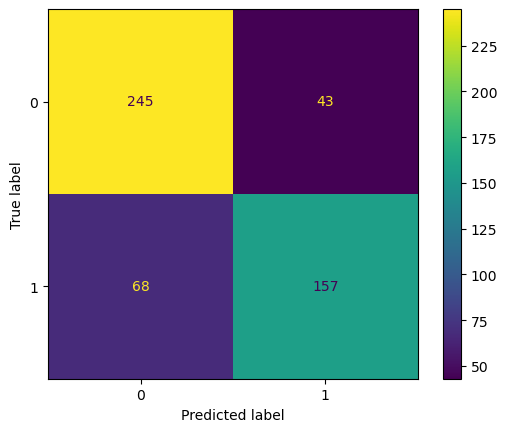

In [6]:
featExt = 'tfidf'

Encoder = LabelEncoder()

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['stemming'])

X = Tfidf_vect.fit_transform(Corpus['stemming'])
y = Corpus[['label']]
y = Encoder.fit_transform(y)
# print(y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print(train_index, test_index)
    
    clf.fit(X_train, y_train)
#     print(clf.coef_)
#     print(clf.intercept_)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'# Fold {fold}:')
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    
#     print(classification_report(y_true_test, y_pred), "\n")
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
# membuat confusion Matrix
    matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    matrix.plot()  
    print(conf_matrix)